In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
x_train = x_train/225
x_test = x_test/225

In [17]:
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)
y_test_cat[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

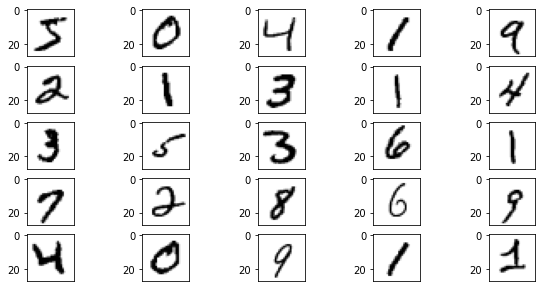

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.xticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.show()

In [19]:
model = keras.Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(units=321,activation = 'relu'),
    Dense(units=10,activation = 'softmax'),
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 321)               251985    
                                                                 
 dense_3 (Dense)             (None, 10)                3220      
                                                                 
Total params: 255,205
Trainable params: 255,205
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
model.fit(x_train,y_train_cat,batch_size = 32,epochs = 5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2355 - accuracy: 0.9313 - val_loss: 0.1333 - val_accuracy: 0.9602
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0970 - accuracy: 0.9708 - val_loss: 0.1052 - val_accuracy: 0.9662
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0632 - accuracy: 0.9806 - val_loss: 0.0924 - val_accuracy: 0.9721
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0810 - val_accuracy: 0.9753
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0859 - val_accuracy: 0.9760


In [23]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0792 - accuracy: 0.9770


[0.07921560853719711, 0.9769999980926514]

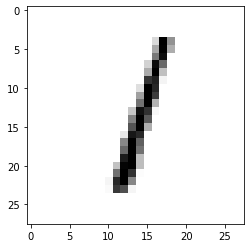

In [24]:
plt.imshow(x_test[2],cmap = plt.cm.binary)
plt.show()

In [25]:
x = np.expand_dims(x_test[5],axis = 0)
res = model.predict(x)
print(res)
print(np.argmax(res))

1/1 [==============================] - 0s 49ms/step
[[3.1506817e-09 9.9932349e-01 5.5151628e-07 1.0522696e-08 1.3240557e-05
  1.4021665e-08 3.1410095e-09 6.6148164e-04 1.1445023e-06 5.2520606e-09]]
1
